In [1]:
from astropy.modeling import models
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import chirp, find_peaks, peak_widths

In [53]:
# Read image and parse to numpy array
img = cv.imread('11.jpg', 0)
img = np.delete(img, np.arange(5), 0)
img = np.delete(img, np.arange(-5, 0), 0)
img = np.delete(img, np.arange(5), 1)
img = np.delete(img, np.arange(-5, 0), 1)

# Normalize array values
img_n = img/np.max(img)

In [54]:
# Graphic dimensions
x = np.linspace(-10,10,num=len(img_n[0]))
y = np.linspace(-10,10,num=len(img_n))
X, Y = np.meshgrid(x,y)
Z = img_n

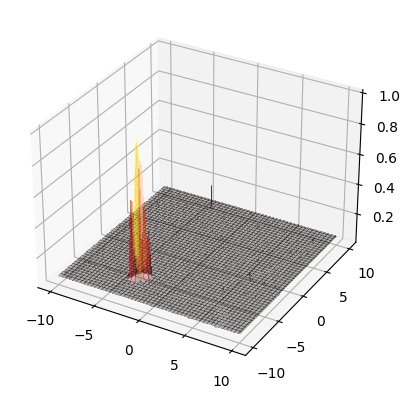

In [55]:
# Build plot
ax = plt.figure().add_subplot(projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap=plt.cm.hot,alpha=0.3, linewidth=0, antialiased=False)

In [56]:
# Extract points to make a 2D projection
xpoints = np.arange(len(img_n[0]))
row = np.argmax(np.max(img_n, axis=1))
ypoints = img_n[row]

In [57]:
def lin_interp(x, y, i, half):
    return x[i] + (x[i+1] - x[i]) * ((half - y[i]) / (y[i+1] - y[i]))

In [58]:
def half_max_x(x, y):
    half = max(y)/2.0
    signs = np.sign(np.add(y, -half))
    zero_crossings = (signs[0:-2] != signs[1:-1])
    zero_crossings_i = np.where(zero_crossings)[0]
    return [lin_interp(x, y, zero_crossings_i[0], half),
            lin_interp(x, y, zero_crossings_i[1], half)]

FWHM:28.464


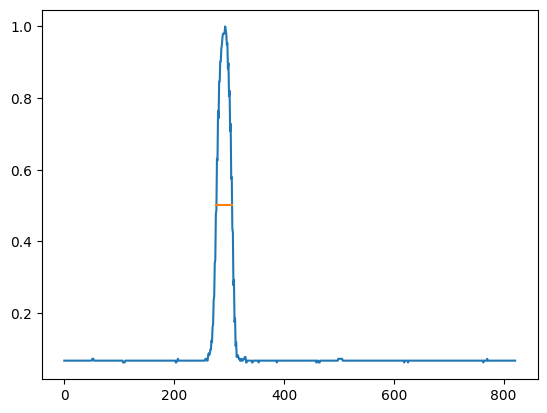

In [59]:
# Calculate FWHM
hmx = half_max_x(xpoints,ypoints)
fwhm = hmx[1] - hmx[0]
print("FWHM:{:.3f}".format(fwhm))

# Show 2D graphic with FWHM
half = max(ypoints)/2.0
plt.plot(xpoints, ypoints)
plt.plot(hmx, [half, half])
plt.show()

In [60]:
focal = 2350
diameter_real_arc = 18.96
diameter_real_arc_with_rings = 44.16
const = 206265

diameter_mm = (focal * diameter_real_arc) / const
diameter_mm_with_rings = (focal * diameter_real_arc_with_rings) / const

print(f"Diámetro: {round(diameter_mm, 3)}mm | Diámetro con anillos: {round(diameter_mm_with_rings, 3)}mm")

Diámetro: 0.216mm | Diámetro con anillos: 0.503mm


In [61]:
detector_size_y_mm = 3.888
detector_size_x_mm = 5.184

pixel_size_mm = detector_size_x_mm / len(xpoints)

fwhm_mm = fwhm * pixel_size_mm
fwhm_micron = fwhm_mm * 100
print(f"FWHM: {round(fwhm_micron, 3)} micras")

FWHM: 17.951 micras
